<a href="https://colab.research.google.com/github/MonaRansing/EDA_Country_wise_population/blob/main/Population_by_country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Analysis of Country_wise_population from 1995 to 2020



##### **Project Type**    - EDA
##### **Contribution**    - Individual




### **Project Summary -**

**Pending**

# **GitHub Link -**

# **Problem Statement**


**In this project I am going to analyse the country_wise_population dataset. This dataset have information of coutry and it's population from 1995 to 2020 and also includes information of yearlt percent changes in population, density, fertility rate, urban population, what is the the share of that pertocular country in world pupulation in percent, global rank of country etc. Using this datatset I am going to find out some insights of world wide population.**

## **Define Your Business Objective?**

**Analyse the data on country wise population and find out some insights related to population.** 


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams


### Dataset Loading

In [ ]:
# My drive is mounted here.
from google.colab import drive               
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Hotel booking dataset read using pd.read_csv
working_dataset = '/content/drive/MyDrive/Almabetter/Data Science/dataset/Countries Population from 1995 to 2020.csv'
population_df = pd.read_csv(working_dataset)

### Dataset First View

In [ ]:
#First view of dataset
population_df.head()

In [ ]:
population_df.tail(5)

### Dataset Rows & Columns count

In [ ]:
# Counting rows and columns in dataframe using shape
population_df.shape                                

(4195, 14)

### The country_wise_population dataset have 4195 rows and 14 columns.

### Dataset Information

In [ ]:
#understanding the given information in dataset
population_df.info()                               

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4195 entries, 0 to 4194
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            4195 non-null   int64  
 1   Country                         4195 non-null   object 
 2   Population                      4195 non-null   int64  
 3   Yearly % Change                 4195 non-null   float64
 4   Yearly Change                   4195 non-null   int64  
 5   Migrants (net)                  3600 non-null   float64
 6   Median Age                      3600 non-null   float64
 7   Fertility Rate                  3600 non-null   float64
 8   Density (P/Km²)                 4195 non-null   object 
 9   Urban Pop %                     4082 non-null   float64
 10  Urban Population                4082 non-null   float64
 11  Country's Share of World Pop %  4195 non-null   float64
 12  World Population                41

### In given dataset "migrants","Median age","Fertility rate","Urban Pop%","Urban Population" these columns have null values.

In [ ]:
 # Here is total description of dataset
population_df.describe()                       

In [ ]:
#Creating the copy of the dataset 
population_df1 = population_df.copy()
population_df1.head()

### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_values = population_df1.duplicated().value_counts()  
duplicate_values

False    4195
dtype: int64

### Given dataset do not have any duplicate values.

### Missing Values

In [33]:
#missing value count 
missing_value = population_df.isnull().sum().sort_values(ascending=False)
missing_value

Migrants (net)                    595
Median Age                        595
Fertility Rate                    595
Urban Pop %                       113
Urban Population                  113
Year                                0
Country                             0
Population                          0
Yearly % Change                     0
Yearly Change                       0
Density (P/Km²)                     0
Country's Share of World Pop %      0
World Population                    0
Country Global Rank                 0
dtype: int64

### What did you know about your dataset?

**The above dataset have 4195 rows and 14 columns. There is no any duplicate value in dataset. There are 5 columns which have missing values and those columns are "migrants","Median age","Fertility rate","Urban Pop%","Urban Population".**

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
population_df1.columns

Index(['Year', 'Country', 'Population', 'Yearly % Change', 'Yearly Change',
       'Migrants (net)', 'Median Age', 'Fertility Rate', 'Density (P/Km²)',
       'Urban Pop %', 'Urban Population', 'Country's Share of World Pop %',
       'World Population', 'Country Global Rank'],
      dtype='object')

In [ ]:
population_df1.head()

In [ ]:
# Dataset Describe
population_df1.describe(include='all')

### Variables Description 

* **Year** : Year of population
* **Country** : Name of country
* **Population** : Population of country
* **Yearly%Change** : percent change in population yearly
* **Yearly Change** : actual change in population yearly
* **Migrants(net)** : number of migrants in that country
* **Median Age** : Median age of country (Median age : The age which divides the population of country in two parts of equal size.)
* **Fertility Rate** : fertility rate of that country
* **Density** : Density of that country
* **Urban pop%** : Percent population in urban area
* **Urban Population" : Actual population in urban area.
* **Country's share of World pop%** : share of that country in world population in percent.
* **World Population** : World population in that perticular year.
* **Country Golbal Rank** : Rank of country in global by population.




### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
# I describe all the unique values using lambda fuction of indivisual column.
print(population_df1.apply(lambda col: col.unique()))

Year                              [2020, 2019, 2018, 2017, 2016, 2015, 2010, 200...
Country                           [China, India, United States, Indonesia, Pakis...
Population                        [1439323776, 1433783686, 1427647786, 142102179...
Yearly % Change                   [0.39, 0.43, 0.47, 0.49, 0.51, 0.55, 0.57, 0.6...
Yearly Change                     [5540090, 6135900, 6625995, 6972440, 7201481, ...
Migrants (net)                    [-348399.0, -310442.0, -435677.0, -393116.0, -...
Median Age                        [38.4, 37.0, 36.7, 35.0, 32.6, 30.0, 27.4, 24....
Fertility Rate                    [1.69, 1.65, 1.64, 1.62, 1.61, 1.83, 2.73, 2.5...
Density (P/Km²)                   [153, 152, 151, 150, 146, 142, 137, 132, 125, ...
Urban Pop %                       [60.8, 59.7, 58.6, 57.5, 56.3, 55.1, 48.9, 42....
Urban Population                  [875075919.0, 856409297.0, 837022095.0, 816957...
Country's Share of World Pop %    [18.47, 18.59, 18.71, 18.83, 18.94, 19.06,

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Null values are replaced using for loop and .fillna()
null_columns=['Migrants (net)','Median Age','Fertility Rate','Urban Pop %','Urban Population']
for columns in null_columns:
  population_df1[columns].fillna(0,inplace=True)

In [31]:
population_df1.isna().sum().sort_values(ascending=False)

Year                              0
Country                           0
Population                        0
Yearly % Change                   0
Yearly Change                     0
Migrants (net)                    0
Median Age                        0
Fertility Rate                    0
Density (P/Km²)                   0
Urban Pop %                       0
Urban Population                  0
Country's Share of World Pop %    0
World Population                  0
Country Global Rank               0
dtype: int64

### What all manipulations have you done and insights you found?

* **In given dataset there is no any duplicate values.**
* **Five coumns have missing values so that values are replace by zero using fillna function.**

## ***4. Data Visualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

1) Top 30 countries by population in 2020.

In [ ]:
# Chart - 1 visualization code
top_30_countries = population_df1[population_df1['Year']==2020][:30]
top_30_countries

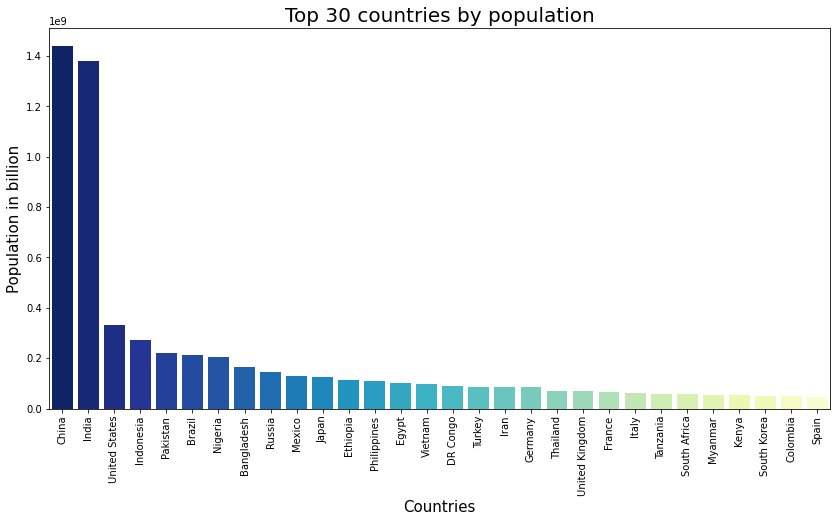

In [46]:
plt.figure(figsize=(14,7))
sns.barplot(x = "Country",y = "Population", data = top_30_countries, palette="YlGnBu_r",saturation = 10,errcolor = "y")
plt.title('Top 30 countries by population', fontsize=20)
plt.ylabel('Population in billion', fontsize=15)
plt.xlabel('Countries', fontsize=15)
plt.xticks(rotation = 90)
plt.show()